In [1]:
import numpy as np
import copy 
import random

class game:
    '''environment for two step task'''
    def __init__(self):
        pass
    
    def phase2(self,action):
        '''returning reward for phase 2'''
        if action == 1:
            return 1
        else :
            return 2 

    def phase3(self,state,action):
        '''returning reward for phase 3'''
        if state == 1 :
            if action == 0:
               return 1
            else:
                return 2
        else:
            if action == 0 :
                return 10
            else:
                return 25
 
 
def softmax(state):
    '''action selection policy'''
    a = np.exp(state[0]*2)/((np.exp(state[0]*2)) + np.exp(state[1]*2))
    return np.random.choice([0,1],p=[a,1-a])

def prob(state): 
    '''return the probability of choosing state 2'''
    a = np.exp(state[1]*2)/((np.exp(state[0]*2)) + np.exp(state[1]*2))
    return a


In [2]:
def qlearning(trials): 
    qtable = np.zeros((4,2))
    reward = game()

    #phase 2
    for i in range(20):
        action = softmax(qtable[0])
        
        qtable[0,action] = qtable[0,action] + 0.01*(reward.phase2(action) - qtable[0,action])
    p2 = prob(qtable[0])
    #phase 3    
    for i in range(trials):
        state = random.choice([2,3]) - 1
        action = softmax(qtable[state])
        r = reward.phase3(state,action)
        qtable[state,action] = qtable[state,action] + 0.01*(r - qtable[state,action])

    #phase4   
    p4 = prob(qtable[0])
    return p2, p4

In [3]:
print(qlearning(30))
print(qlearning(50))

(0.493305236528344, 0.493305236528344)
(0.4659011321944858, 0.4659011321944858)


As we can see that in all cases probability of agent choosing state 2 in phase 2 and phase 4 does not changes so there is no revaluation done by agent.

In [4]:
class Model():
  def __init__(self):
    self.transitions = np.zeros((4,2), dtype=np.uint8)
    self.rewards = np.zeros((4,2))
    self.snext = np.array([[1,2],[3,3],[3,3]])
    

  def add(self,s,a,r):
    '''adding previously seen state-action pairs'''  
    self.transitions[s,a] = self.snext[s,a]
    self.rewards[s,a] = r
    

  def sample(self):
    """ Return random state, action"""
    # Random visited state
    s = np.random.choice(np.where(np.sum(self.transitions, axis=1) > 0)[0])
    # Random action in that state
    a = np.random.choice(np.where(self.transitions[s] > 0)[0])
    return s,a

  def step(self, s,a):
    """ Return state_prime and reward for state-action pair"""
    next = self.transitions[s,a]
    r = self.rewards[s,a]
    return next,r

def planning(n,model,states):
    """ Reinforces the previously learnt state-action pairs"""
    for i in range(n):
      s, a = model.sample()
      next,reward = model.step(s,a)
      states[s,a] = states[s,a] + 0.01*(reward - states[s,a] + 1*max(states[next]))
    return states

def dynaq(load,n_plan,trials):
    #defines load or no load condition 
    #n is number of planning steps per real steps in phase 3 
    if load==1:
        n = 1
    else:
        n = 2
    
    m = Model()
    qtable = np.zeros((4,2))
    reward = game()

    #phase 2
    for i in range(20):
        action = softmax(qtable[0])
        m.add(0,action,reward.phase2(action))
        qtable[0,action] = qtable[0,action] + 0.01*(reward.phase2(action) - qtable[0,action])
    p2 = prob(qtable[0])
    
    #phase 3    
    for i in range(trials):
        state = random.choice([2,3]) - 1
        action = softmax(qtable[state])
        #reward for phase 3
        r = reward.phase3(state,action)
        m.add(state,action,r)
        
        #dynaq algorithm
        qtable[state,action] = qtable[state,action] + 0.01*(r - qtable[state,action])
        qtable = planning(n,m,qtable)
    ''''''
    qtable = planning(n_plan,m,qtable)
    
    #phase4   
    p4 = prob(qtable[0])
    return p2, p4

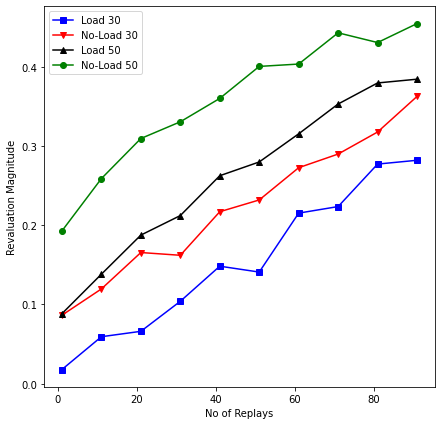

In [5]:

x = [i for i in range(1,101,10)]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

# Load 30 
reval = []
for i in range(1,101,10):
    sum = 0
    for k in range(100):
        p2,p4 = dynaq(1,i,30)
        sum = sum + p4-p2
    reval.append(sum/100)

plt.plot(x,reval,color = 'blue', label = 'Load 30',marker = 's')

# No-Load 30 
reval = []
for i in range(1,101,10):
    sum = 0
    for k in range(100):
        p2,p4 = dynaq(0,i,30)
        sum = sum + p4-p2
    reval.append(sum/100)

plt.plot(x,reval,color = 'red', label = 'No-Load 30', marker = 'v')

# Load 50
reval = []
for i in range(1,101,10):
    sum = 0
    for k in range(100):
        p2,p4 = dynaq(1,i,50)
        sum = sum + p4-p2
    reval.append(sum/100)

plt.plot(x,reval, color = 'black', label = 'Load 50', marker = '^')

# No-Load 50
reval = []
for i in range(1,101,10):
    sum = 0
    for k in range(100):
        p2,p4 = dynaq(0,i,50)
        sum = sum + p4-p2
    reval.append(sum/100)


plt.plot(x,reval, color = 'green', label= 'No-Load 50', marker = 'o')
plt.xlabel('No of Replays')
plt.ylabel('Revaluation Magnitude')
plt.legend()
plt.savefig('twosteptask.png')
print()